<a href="https://www.kaggle.com/code/erdemtaha/cancer-prediction-96-5-with-logistic-regression?scriptVersionId=147562203" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Predicting Cancer Data With Logistic Regression**
## 🏆 Accuracy: %96.50
- **We will apply the  Logistic Regression algorithm to a data set with 570 cancer cells and 30 features to determine whether the cancer cells in our data are benign or malignant.**


- **The cancer data we have contains 2 types of cancer 1. benign cancer (B) and 2. malignant cancer (M).**

#### 🔗 Github Links: https://github.com/Prometheussx/Cancer_Data_Classification

## Content:
* [**1.** Library and Input File](#1)
* [**2.** Data Loading and Editing](#2)
* [**3.** Normalization ](#3)
* [**4.** Train Test Split](#4)
* [**5.** Initialize Weights and Bias](#5)
* [**6.** Sigmoid Function](#6)
* [**7.** Forward Bacward Propagation](#7)
* [**8.** Updating(Learning) Parameters](#8)
* [**9.** Prediction](#9)
* [**10.** Logistic Regressin Algorithm](#10)
* [**11.** Model Result](#11)

## **Computation graph of logistic regression**
**To explain step by step**
* Parameters are weight and bias.

* Weights: coefficients of each pixels

* Bias: intercept

* z = (w.t)x + b => z equals In an other saying => z = b + px1w1 + px2w2 + ... + px4096*w4096
   * (w.t) ==> Transpose of weight


* Predict Data = y_head 

* y_head = sigmoid(z)

* The sigmoid function reduces the obtained prediction data, i.e. z's, to a value between 0 and 1 


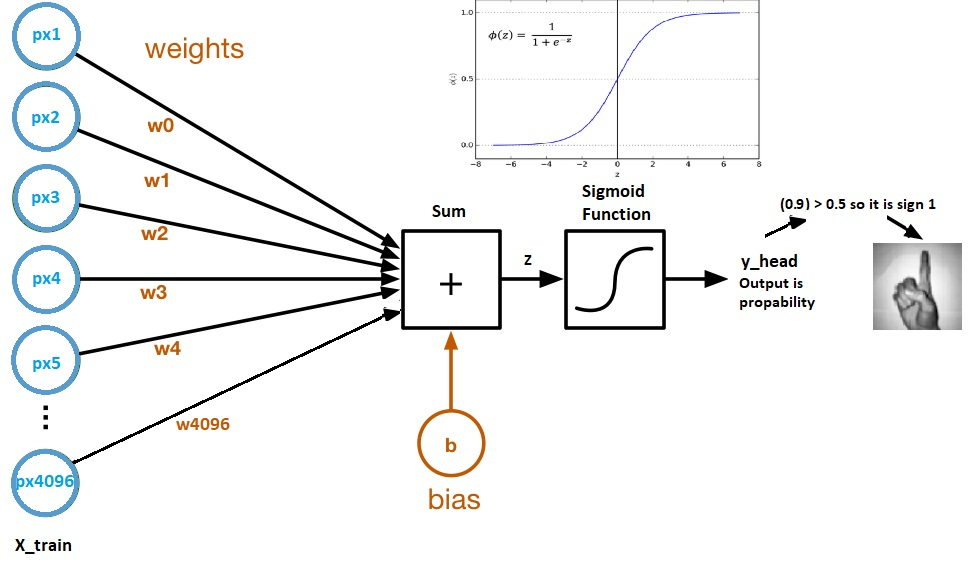

<a id = "1"></a>
# 1. Library and Input File

In [197]:
#Library
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Graphic Draw

#İnput File
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/cancer-data/Cancer_Data.csv


<a id = "2"></a>
# 2.Data Loading and Editing

In [198]:
#Data Loading
data = pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv') 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

* ## Why are we editing data ?
    * ### why delete "id" and "unnamed: 32"?
        * **"Untitled: 32" and "id" values are redundant for the data set.**
        * **Can manipulate the model we will train.**
        * **A struct consisting entirely of nulls such as "Unnamed: 32" may create an error margin for us in the future.**
    * ### why do we make "M" and "B" in "diagnosis" 0 and 1 ?
        * **Objects are not used in modeling, so we convert them to numeric type.**
        * **Since we will apply normalization process to all data, it creates a healthier result for us that the data to be classified consists of 1 and 0.**

In [199]:
#Data Editing
data.drop(["Unnamed: 32","id"],axis=1,inplace = True) 
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis] 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [200]:
# Split the data by x and y
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis = 1)

In [201]:
print("X Data graph")
pd.DataFrame(x_data)

X Data graph


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [202]:
print("Y Data Graph")
pd.DataFrame(y)

Y Data Graph


,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


<a id = "3"></a>
# 3. Normalization 
* **The normalization process ensures that very high values or very low values in the data we have are brought between 0 and 1, thus preventing them from creating a margin of error in the prediction model. In this way, we get rid of high values and small values and bring them closer to other numbers.**

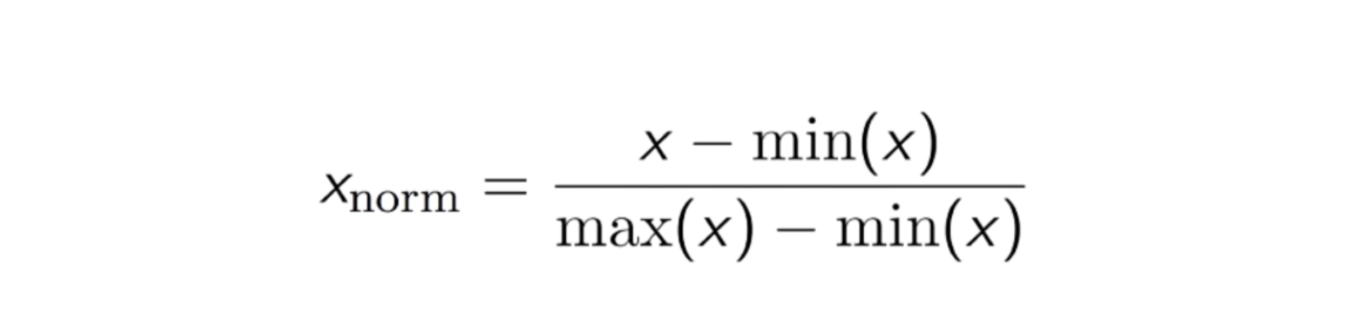

In [203]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values #Normalization Formula
pd.DataFrame(x)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


<a id = "4"></a>
# 4 . Train Test Split 
*  **%80 Train Data (x_train, y_train)**
 
*  **%20 Test Data (x_test,y_test)**

In [204]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Why did we take the transpose of matrices ?
   * **Since the matrix operations we will apply in the future require "nxm mxn" in the matrix operations we will apply in the future, we have made it available by transposing some matrices**

In [205]:
#Matrkis Transpoz
x_train = x_train.T 
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

<a id = "5"></a>
# 5. Initialize Weights and Bias
* **When determining the values of the weights and bias, we use the general standard of 0.01 for w and 0.0 for b. In order for w to exist for each feature, we print 0.01 in a matrix of feature size by making np.full(dimension,1),0.01)**

<a id = "6"></a>
# 6. Sigmoid Function
* **Ensures that the prediction values are between 0 and 1**;
* **It gives probabilistic result**
* **It is derivative so we can use it in gradient descent algorithm.**

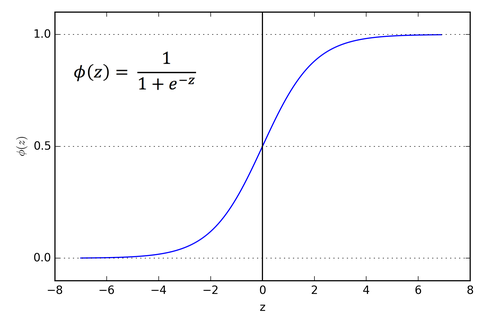

In [206]:
def initialize_weights_and_bias(dimension):

    w=np.full((dimension,1),0.01) 
    b = 0.0 
    
    return w,b



def sigmoid(z): 
    y_head = 1/(1+np.exp(-z)) 
    return y_head

<a id = "7"></a>
# 7. Forward Bacward Propagation
* ## Forward
    * **The Forward structure is a forward working version of the logistic regression structure**
* ## Bacward
    * **Bacward finds the average change in weight and bias with the derivative, called the "slope", which is the slope of the tangents drawn to the differentiable function on the graph of the cost. The closer the cost is to 0, the better the weight or bias is**
    
    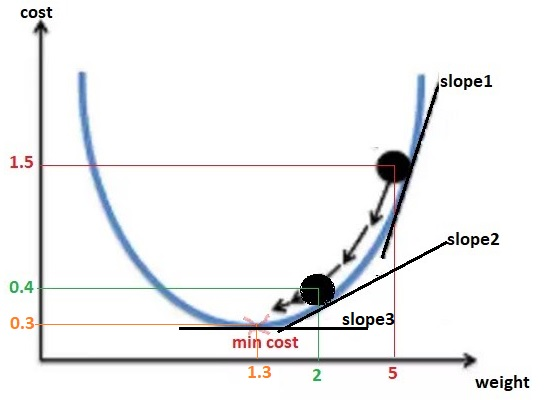
    
* ## Loss
    * **Is the margin of error in the data**
    
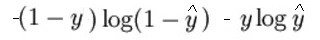

In [207]:
def forward_bacward_propagation(w,b,x_train,y_train):
    #FORWARD
    z = np.dot(w.T,x_train)+b 
    y_head = sigmoid(z) 
    loss= -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head) 
    cost = (np.sum(loss))/x_train.shape[1] 

    #BACKWARD
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias= np.sum(y_head-y_train)/x_train.shape[1] 
    
    gradients = {"derivative_weight": derivative_weight, "derivative_bias":derivative_bias} 
    return cost,gradients

<a id = "8"></a>
# 8. Updating(Learning) Parameters
* **We update by taking the derivatives of weight and bias in accordance with the cost values, so we can get new results every time.**

In [208]:
def update(w, b, x_train, y_train, learning_rate, number_of_iteration): #number of iteration kaç tur denenceğini söyler deneme yanımayla bulunur
    cost_list =[]
    cost_list2 = []
    index =  []
    
    
    #updating(Learning) parameters is number_of_iteration times
    print("  Cost Results after iteration \n","-------------------------------------------")
    for i in range(number_of_iteration):
       # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_bacward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)  
       #lets update 
    
        w = w - learning_rate * gradients["derivative_weight"]   
        b = b - learning_rate * gradients["derivative_bias"]   
        if i % 10 == 0: 
            cost_list2.append(cost) 
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost)) 
            
    print("-------------------------------------------") 
    # we update(learn) parameters wights and bias
    parameters = {"weight": w, "bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation="vertical")
    plt.xlabel("Number of İteration")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id = "9"></a>
# 9. Prediction
* **Classifies all z-values obtained one by one according to whether they are less than 0.5**

* **if z is bigger than 0.5 our prediction is sign one (y_head = 1)**
* **if z is smaller than 0.5 our prediction is sign one (y_head = 0)**


In [209]:
def predict(w,b,x_test):
     #x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1])) 
     #if z is bigger than 0.5 our prediction is sign one (y_head = 1)
     #if z is smaller than 0.5 our prediction is sign one (y_head = 0)
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5: 
            Y_prediction[0,i] = 0
        else:
             Y_prediction[0,i] = 1
             
    return Y_prediction

<a id = "10"></a>
# 10. Logistic Regressin Algorithm
* **In this study, we have developed a study classification by developing our own model without using any model library.**

* **Print train/test Errors**
    * **if the truth is 1 and the prediction is 0, the absolute value is 1, 1*100 is 100, 100-100 is 0 and the result is incorrect**
    * **If the result is 0 and 0, then 0-0 is 0, 100*0 is 0, 100-0 is 100 and the result is correct**

  Cost Results after iteration 
 -------------------------------------------
Cost after iteration 0: 0.692977
Cost after iteration 10: 0.499667
Cost after iteration 20: 0.406616
Cost after iteration 30: 0.351936
Cost after iteration 40: 0.315762
Cost after iteration 50: 0.289862
Cost after iteration 60: 0.270257
Cost after iteration 70: 0.254795
Cost after iteration 80: 0.242214
Cost after iteration 90: 0.231722
Cost after iteration 100: 0.222796
Cost after iteration 110: 0.215080
Cost after iteration 120: 0.208317
Cost after iteration 130: 0.202324
Cost after iteration 140: 0.196961
Cost after iteration 150: 0.192121
Cost after iteration 160: 0.187722
Cost after iteration 170: 0.183698
Cost after iteration 180: 0.179997
Cost after iteration 190: 0.176577
Cost after iteration 200: 0.173402
Cost after iteration 210: 0.170443
Cost after iteration 220: 0.167676
Cost after iteration 230: 0.165080
Cost after iteration 240: 0.162638
Cost after iteration 250: 0.160334
Cost after iteration 260

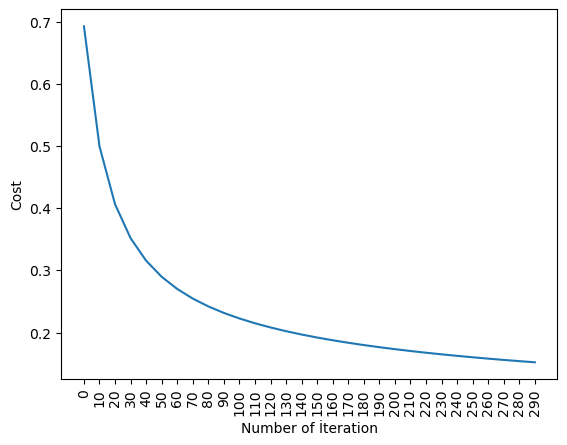

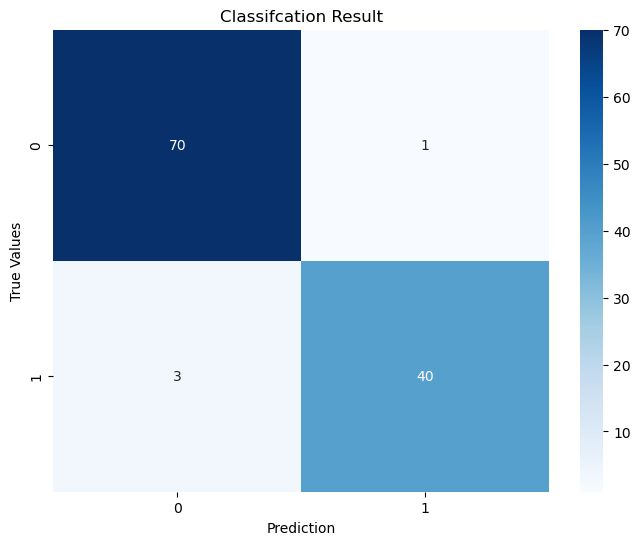

Result Evaluation 
 ------------------------------------

Sum True Prediction: 110

Sum False Prediction: 4

test accuracy: 96.49122807017544 %


In [210]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 30
    w,b = initialize_weights_and_bias(dimension)
    
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)  #predict
  
    #seaborntable
    cm = confusion_matrix(y_test, y_prediction_test.reshape(-1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Prediction')
    plt.ylabel('True Values')
    plt.title('Classifcation Result')
    correct_predictions = np.trace(cm)
    total_predictions = np.sum(cm)
    incorrect_predictions = total_predictions - correct_predictions
    plt.show()
    
    #Result Evaluation
    print("\n")
    print("Result Evaluation \n","------------------------------------\n")
    
    print(f'Sum True Prediction: {correct_predictions}\n')
    print(f'Sum False Prediction: {incorrect_predictions}\n')
    # Print train/test Errors
 
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, num_iterations = 300) 

<a id = "11"></a>
# 11. Model Result
0.692977 at cost
We have reached 0.152266 cost value after 290 updates.
As a result of this situation, the model has reached the number of turns we want and has reached the test accuracy: 96.49122807017544 %, proving that it is a healthy model.
As noticed, as the accuracy value approached 100, the cost value started to decrease less.

**For example:**

*Cost after iteration 260: 0.158155*

*Cost after iteration 270: 0.156091*

*Cost after iteration 280: 0.154131*

*Cost after iteration 290: 0.152266*

From round 260 to round 290 there was only an average decrease of 0.006
This shows that the error rate decreases to very minimal values as the accuracy rate increases, as seen in the graph. In this case, the training is finished and the result is considered sufficient because further training does not make a great contribution to the model.

## Result Evaluation 

* Sum True Prediction: 110

* Sum False Prediction: 4

* Test Accuracy: 96.49122807017544 %